# Default of Credit Card Clients

Credit card default is the failure to meet the legal obligations of a credit card, like paying your credit card in a timely manner. This not only lowers your credit score, but affects your ability to get approved for other credit cards, loans, and other credit-based services. 

Back in 2005, Taiwan faced a large cash and credit card debt crisis. Card-issuing banks over-issued cash and credit cards to unqualified applicants while cardholders overused credit card consumption and accumulated large debts. By February 2006, debt from credit and cash cards reached 268 billion dollars; more than half a million people were not able to repay their loans. 

This crisis not only hurt the financial system, but also resulted in significant societal problems. Many debtors committed suicide, some became homeless, and other's no longer could afford sending their children to school. People began resorting to illegal drug sales. In addition, violent and treatening collection practices added additional pressure. According to the Taiwanese Department of Health, 4,406 committed suicide in 2006 (which was a 22.9 percent increase from 2005). Suicide rates in Taiwain are the second highest in the world and the main reason often is unemployment and credit card debt.

Credit card debt can lead to serious financial and societal issues. In order to prevent this from happening again, it is important to examine past credit card information to determine who are high risk borrows. Therefore, the government can effectively devise a solution to resolve this problem. 

*Source: [Taiwan's Credit Card Crisis](https://sevenpillarsinstitute.org/case-studies/taiwans-credit-card-crisis/) by Eric Wang*

**Problem Statement:** How do you predict if a cardholder is likely to default on their credit card? What are the strongest predictors of default payment? What demographic variables indicate high risk borrowers?

**Dataset Description:** This dataset has 23 predictor variables and 30000 instances. The ID variable was dropped. There are no missing values. 

```{r}
   ----------------------------------------------------------------------------------------
   Name                 Explantion        
   -------------------- -------------------------------------------------------------------
   limit_bal            Amount of the given credit (NT dollar) - Numeric
                        it includes both the individual consumer credit 
                        and his/her family (supplementary) credit.

   sex                  Gender - Categorical
                        (1 = male; 2 = female)

   education            Education - Categorical
                        (1 = graduate school; 2 = university; 3 = high school; 4 = others)

   marriage             Marital status - Categorical
                        (1 = married; 2 = single; 3 = others)

   age                  Age (years) - Numeric

   pay_1 - pay_6        History of past payment. Past monthly payment records - Numeric
                        From April to September, 2005 as follows:

                        pay_1 = the repayment status in September, 2005
                        pay_2 = the repayment status in August, 2005
                        ...
                        pay_6 = the repayment status in April, 2005 

                        The measurement scale for the repayment status is: 
                        -1 = pay duly; 
                        1 = payment delay for one month 
                        2 = payment delay for two months
                        ...
                        8 = payment delay for eight months 
                        9 = payment delay for nine months and above

   bill_amt1-bill_amt5  Amount of bill statement (NT dollar) - Numeric
                        bill_amt1 = amount of bill statement in September, 2005 
                        bill_amt2 = amount of bill statement in August, 2005
                        ...
                        bill_amt6= amount of bill statement in April, 2005 

   pay_amt1-pay_amt6    Amount of previous payment (NT dollar) - Numeric
                        pay_amt1 = amount paid in September, 2005
                        pay_amt2 = amount paid in August, 2005
                        ...
                        pay_amt6 = amount paid in April, 2005 
   ----------------------------------------------------------------------------------------
```

**Performance Metric:** Accuracy

**Personal Goal:**
- Learn to compare different predictive models using a larger binary classification dataset
- Learn to use XGBoost
- Create a model with at least 80% accuracy

**Workflow**
1. [Splitting the Data](#Splitting the Data)
2. [EDA](#EDA)
3. [Data Preprocessing](#Data Preprocessing)
4. [Modeling](#Modeling)
5. [XGBoost](#XGBoost)
6. [Solution Statement](#Solution Statement)

<a id='Splitting the Data'></a>

# 1. Splitting the Data

## Loading the Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas  as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in dataset
data = pd.read_excel('./input/default_of_credit_card_clients.xls', header = 1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Train Test Split

In order to test my models, I have to separate the data into smaller train and test datasets.

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(data, test_size = 0.4, random_state = 42)

In [5]:
# Ensure the test data doesn't have the answer
test_solution = test['default payment next month']
test = test.drop('default payment next month', axis = 1)

<a id='EDA'></a>

# 2. Exploratory Data Analysis

## What are the strongest predictors of default payment? 

Looking at the dataset, I noticed there are no missing values in the dataset and every variable is numeric.

In [6]:
train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000
mean,15028.406556,167669.555556,1.604056,1.847722,1.551167,35.494278,-0.017778,-0.133556,-0.170278,-0.221444,...,43404.986889,40522.449111,39059.408833,5654.767222,6.046226e+03,5164.765556,4916.151889,4861.909278,5215.464222,0.221833
std,8682.690109,129565.655123,0.489066,0.791069,0.522130,9.220486,1.123872,1.194533,1.184682,1.160093,...,64540.116137,60984.582526,59565.529154,17316.636450,2.622850e+04,18060.466764,16101.909112,16021.170231,17761.720451,0.415491
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7435.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2301.000000,1744.500000,1284.750000,980.000000,9.000000e+02,390.000000,293.000000,286.000000,150.000000,0.000000
50%,15099.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19037.000000,18201.500000,17164.000000,2101.000000,2.023500e+03,1800.000000,1500.000000,1512.000000,1500.000000,0.000000
75%,22539.250000,240000.000000,2.000000,2.000000,2.000000,42.000000,0.000000,0.000000,0.000000,0.000000,...,55167.500000,50646.000000,49502.250000,5022.250000,5.000000e+03,4598.500000,4044.750000,4086.500000,4000.000000,0.000000
max,29999.000000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,7.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,527143.000000,1.000000


This table gives a quick overview of the mean and quartiles of each variable. 22% of the people defaulted payment the next month. In order to determine which variable to examine more closely, I will look at its correlation with my target variable.

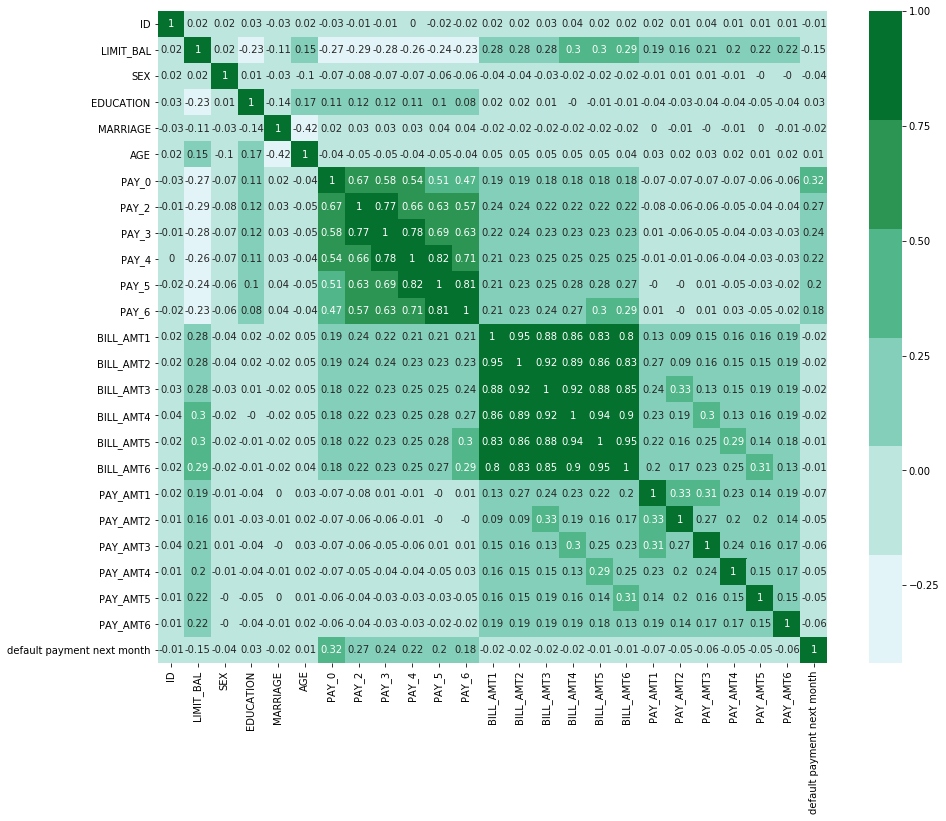

In [7]:
plt.figure(figsize=(15,12))
cor = round(train.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

**Observation:**  
The variable that seems most correlated with defaulting is PAY_#. It is interesting that the repayment status in September, 2005 seems to be a bigger indicator of defaulting and each month before it (up until April, 2005) becomes slightly less correlated.
The LIMIT_BAL or given credit is another variable correlated to default payment. Because given credit is based off of annual income, credit score, and other financial assets, it is not suprising that it is a factor in predicting who is likely to default payment next month.

### PAY_0-6

In [8]:
train[['PAY_0', 'default payment next month']].groupby(['PAY_0'], as_index = False).mean()

,PAY_0,default payment next month
0,-2,0.132479
1,-1,0.174240
2,0,0.127304
3,1,0.339890
4,2,0.687817
5,3,0.755869
6,4,0.791667
7,5,0.562500
8,6,0.625000
9,7,0.666667


Based on the data description, the measurement scale for repayment status follows that:  

-1 = pay duly, or paid properly  
1 = payment delay for one month  
2 = payment delay for 2 months  
...  
8 = payment delay for 8 months  
9 = payment delay for 9+ months  

**Observation:**  
It seems like whether repayment was paid duly or delayed is a big indicator of whether or not default payment will occur next month. The other PAY_# features will be looked at to confirm this hypothesis. There are also values -2, -1, and 0, which are not explained in the description. Because it has similar default proportions as -1, I will assume that it indicates repayment was paid duly. It will be relabeled as -1.

Let's look at the other PAY_# to see if there are any general insights we can make about this variable.

In [9]:
# Function to get default payment means 
def get_pay_mean(PAY_NUM):
    temp = train[[PAY_NUM, 'default payment next month']].groupby([PAY_NUM], as_index = True).mean()
    pay_mean = temp['default payment next month']
    return pay_mean

In [10]:
pay_means = {}
for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    pay_means[i] = get_pay_mean(i)
pay_means_results = pd.DataFrame(pay_means)
#pay_means_results.reset_index(level=0, inplace=True)
pay_means_results

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,0.132479,0.186296,0.190377,0.195318,0.198235,0.203291
-1,0.174240,0.160410,0.153761,0.156619,0.164264,0.168424
0,0.127304,0.157391,0.173132,0.182947,0.189799,0.190050
1,0.339890,0.285714,0.000000,0.000000,NaN,NaN
2,0.687817,0.561367,0.530630,0.531960,0.540712,0.502413
3,0.755869,0.607735,0.574468,0.610169,0.621053,0.633028
4,0.791667,0.562500,0.592593,0.710526,0.590909,0.741935
5,0.562500,0.666667,0.545455,0.437500,0.727273,0.555556
6,0.625000,0.714286,0.444444,0.500000,1.000000,0.692308
7,0.666667,0.444444,0.769231,0.870968,0.843750,0.833333


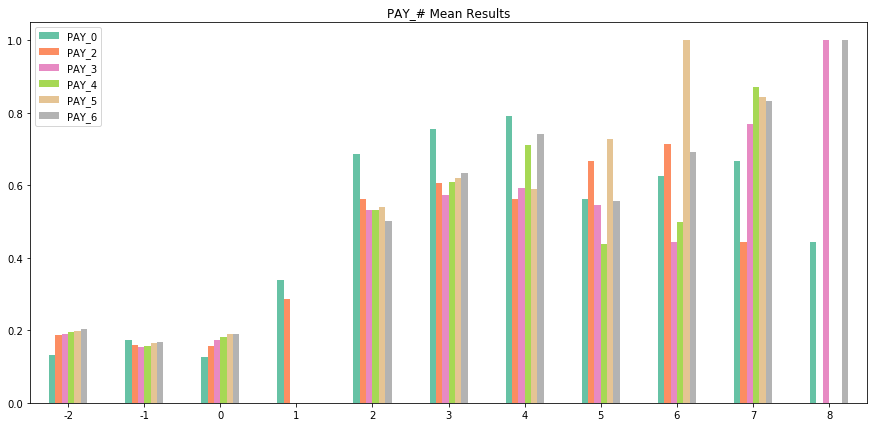

In [11]:
pay_means_results.plot(kind = 'bar', title = 'PAY_# Mean Results', figsize=(15, 7), legend=True, rot = 0, colormap = 'Set2')

**Obseration:**  
By plotting all the different repayment months together, I hoped to see if there was any general patterns I could make about delayed payments. Those who paid duly (-2, -1, 0) had the lowest chance of default payment next month (~15-20%) Those who paid late then do have a higher chance of default payment next month. There doesn't seem like a pattern in how many months delayed from the repayment month except for the fact that default payment next month rate is usually above 50%.

### Limit Balance

LIMIT_BAL corresponds to the given credit of both the card holder and its family members. Normally, those with good credit score, higher income, and more assets are granted a higher credit card limit.

Text(0.5,1.05,'Limit Balance and Default Rate Distribution')

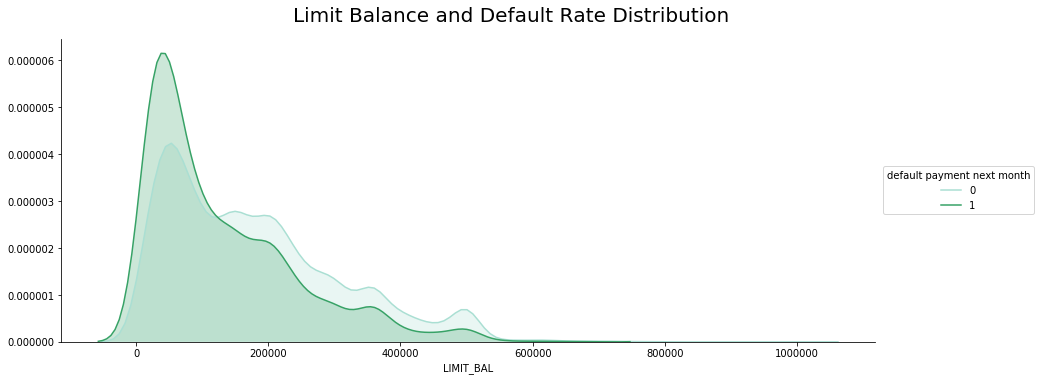

In [12]:
# Limit Balance and Default Rate Distribution
age_survival_dist = sns.FacetGrid(train, hue = 'default payment next month', aspect = 2.5, size = 5, palette = 'BuGn')
age_survival_dist.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

**Observations:**  
It seems like those with lower credit limits are more likely to default, whereas those with higher credit limits are less likely to default.

## What demographic variables indicate high risk borrowers?

High risk borrowers are card credit holders who will default payment next month. The demographic variables we will look at in this dataset include age, sex, marriage, and education.

### Age

Based on the table above, 50% of credit card holders fall somewhere between 28-42, with the average at 35. The oldest person with a credit card in the train set is 75 whereas the youngest person is 21.

Text(0.5,1.05,'Age and Default Rate Distribution')

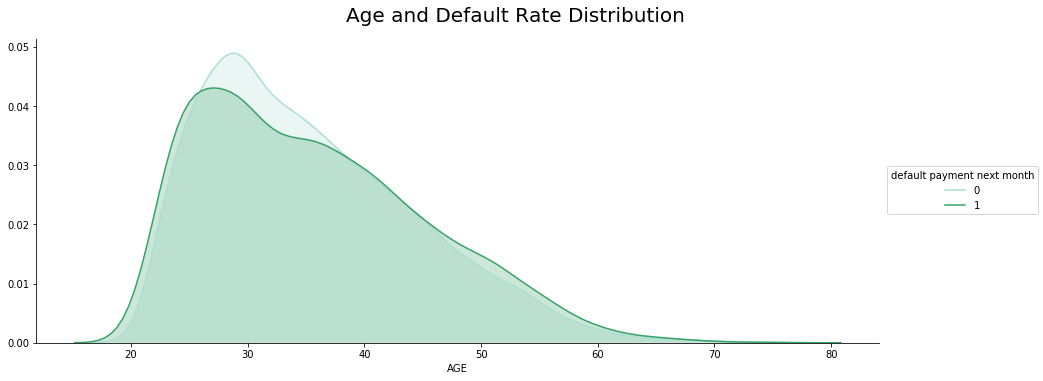

In [13]:
# Age and Default Rate Distribution
age_survival_dist = sns.FacetGrid(train, hue = 'default payment next month', aspect = 2.5, size = 5, palette = 'BuGn')
age_survival_dist.map(sns.kdeplot, 'AGE', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Age and Default Rate Distribution', fontsize = 20, y = 1.05)

**Observation:**  
Based on the graph, the distributions are quite similar and it doesn't seem like age plays a large role in whether or not the card holder will default payment next month. However, those who are in their 25-40 have a slightly lower chance of default.

### Sex

1 stands for male and 2 stands for female.

In [14]:
train[['SEX', 'default payment next month']].groupby(['SEX'], as_index = False).mean()

,SEX,default payment next month
0,1,0.242739
1,2,0.208130


**Obseration:**  
The difference between being male and female have a very small affect on whether or not the client will default payment next month. There is a slightly higher chance if you are male.

### Marriage

Marriage is classified into 1 = married, 2 = single and 3 = other.

In [15]:
train[['MARRIAGE', 'default payment next month']].groupby(['MARRIAGE'], as_index = False).mean()

,MARRIAGE,default payment next month
0,0,0.100000
1,1,0.233204
2,2,0.211677
3,3,0.258883


**Observation:**  
I am not quite sure what 0 means in this case but there are only 30 values where marriage = 0 and I will classify it as other. Those who are single have a slightly lower chance of defaulting than married or other.

### Education

Education is classified as 1 = graduate school, 2 = university, 3 = high school and 4 = other.

In [16]:
train[['EDUCATION', 'default payment next month']].groupby(['EDUCATION'], as_index = False).mean()

,EDUCATION,default payment next month
0,0,0.000000
1,1,0.193804
2,2,0.238305
3,3,0.250600
4,4,0.095890
5,5,0.053571
6,6,0.125000


**Observation:**  
Once again, this variable has several values not mentioned in the data description. Therefore, I will also classify it as other. However, it does seem that those with higher education have a lower chance of defaulting. Those in order have a lower chance of default.

<a id='Data Preprocessing'></a>

# Data Preprocessing

A lot of the data had values not in the data description and was mislabeled. I also tried normalizing this data set, but it didn't change many of the values, so I have decided to leave it as is.

## Cleaning the Data

In [17]:
credit_card = train.append(test, ignore_index = True)

credit_card['MARRIAGE'].replace(0, 3, inplace = True)
credit_card['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

## Drop Irrelevant Variables

In [18]:
credit_card = credit_card.drop(['ID'], axis = 1)
credit_card.shape

(30000, 24)

In [19]:
train_cleaned = credit_card[0:18000]
test_cleaned = credit_card[18000:30000]

<a id='Modeling'></a>

# Modeling

## How do you predict if a cardholder is likely to default on their credit card?

The best way to predict if a cardholder is likely to default on their credit card is to test different algorithms. The algorithms I will be using to test which will perform the best on determining credit card default is:
- Logistic Regression
- KNN
- Naive Bayesian Classifier
- Artifical Neural Networks
- Decision Tree
- Random Forest

The best model should also be able to predict the test set with at least 80% accuracy.

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from tqdm import tqdm
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

In [21]:
# Train Test Split
features = train_cleaned.drop('default payment next month', axis=1)
target = train_cleaned['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.4, random_state=100)

### Logistic Regression

In [22]:
logr = LogisticRegression()
logr_parameters = {'penalty': ['l1', 'l2'], 
                   'C' : [10, 20, 30, 40, 50, 60]
                  }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(logr, logr_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
logr = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
logr.fit(X_train, y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [23]:
logr.predict(X_test)
round(logr.score(X_train, y_train) * 100, 2)

81.09

### KNN

In [24]:
knn = KNeighborsClassifier()
knn_parameters = {'n_neighbors': range(6,9),
                  'leaf_size': [3, 5, 7, 10]
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(knn, knn_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
knn = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=5, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [25]:
knn.predict(X_test)
round(knn.score(X_train, y_train) * 100, 2)

79.72

### Naive Bayesian Classifier

In [26]:
nbc = GaussianNB()
nbc_parameters = {}

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(nbc, nbc_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
nbc = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
nbc.fit(X_train, y_train)

GaussianNB(priors=None)

In [27]:
nbc.predict(X_test)
round(nbc.score(X_train, y_train) * 100, 2)

38.49

### Artifical Neural Networks

In [28]:
ann = MLPClassifier()
ann_parameters = {'hidden_layer_sizes': [(100,1), (100,2), (100,3)],
                  'alpha': [.0001, .001, .01, .1, 1],
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(ann, ann_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
ann = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
ann.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.01, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [29]:
ann.predict(X_test)
round(ann.score(X_train, y_train) * 100, 2)

77.65

### Decision Trees

In [30]:
dt = DecisionTreeClassifier()
dt_parameters = {'max_depth': [2,6,10], 
                 'min_samples_split': range(2,5),
                 'min_samples_leaf': range(1,5),
                 'max_features': [5, 10, 15]   
                }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(dt, dt_parameters, cv = 10, scoring = acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
dt = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=15, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [31]:
dt.predict(X_test)
round(dt.score(X_train, y_train) * 100, 2)

82.06

### Random Forest

In [32]:
rfc = RandomForestClassifier()
rfc_parameters = {'max_depth': [2,6,10], 
                  'min_samples_split': range(2,5),
                  'min_samples_leaf': range(1,5),
                  'n_estimators': range(5,10)
                 }

acc_scorer = make_scorer(accuracy_score)

# Run the 10-fold grid search
grid_obj = GridSearchCV(rfc, rfc_parameters, cv = 10, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the algorithm to the best combination of parameters
rfc = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=7, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [33]:
rfc.predict(X_test)
round(rfc.score(X_train, y_train) * 100, 2)

82.68

## Results

Based on my results, Random Forest was the best performer. Let's see how it performed with the actual test set.

In [39]:
guess = rfc.predict(test_cleaned.drop(['default payment next month'], axis = 1)).astype(int)
sum(guess == test_solution)/guess.size

0.8104166666666667

<a id='XGBoost'></a>

# 5. XGBoost

This extremely popular algorithm has dominated many Kaggle competitions and I wanted to test it on this dataset.

In [34]:
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

In [35]:
clf = xgb.XGBClassifier(max_depth=7, learning_rate=0.2, n_estimators=200)
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [36]:
clf.predict(X_test)
round(clf.score(X_train, y_train) * 100, 2)

97.91

In [37]:
# Performance on Real Data Set
guess = clf.predict(test_cleaned.drop(['default payment next month'], axis = 1)).astype(int)
sum(guess == test_solution)/guess.size

0.8088333333333333

<a id='Solution Statement'></a>

# 6. Solution Statement

Credit card default is a serious issue that needs to be addressed. Based on the dataset, I can make the following conclusions:
- The strongest predictors of default payment is history of past payment (particularly from the most recent month) and the amount of given credit, or limit balance. Repayment status in September, 2005 had the strongest correlation to default payment next month, but all other months were correlated with default rates. Those who paid duly were least likely to default (~20%) whereas anyone who had a payment delay (regardless of how many months) had ~50-60% chance of default payment. Second, those with lower limit balance had a higher chance of default payment than people with higher limit balance.
- Some demographic populations are more prone to default. Males (~24%) were more likely to default than females (~20%). People with graduate school or other education were less likely to default than those who only studied in university or high school. In fact, those with high school diplomas had a ~25% chance of default. People with relationship status of "Other" also had a slightly higher chance of default. Though age didn't play a large role in default, people between ages 25-40 have a higher chance of default; however, this may be due to the fact that most credit card holders fall in that age range.

Using those conclusions, I will provide the following recommendations:
- Since there weren't any extreme demographic variables that indicated high risk borrowers, every credit card holder should receive information or a quick course on credit card usage before they are granted a card. There could also be additional information targeting the aforementioned population but it isn't necessary.
- Instead, monitoring repayment history is more useful. If any card holder fails to pay duly, monitor the holder. They could watch a video about credit card default and be required to learn more information about the issue, since those who delay payment have a higher chance of default. In addition, card holders with low credit limits should also be watched.
- The best way to predict if a cardholder is likely to default on their credit card is with Random Forest.